In [1]:
from matplotlib import pyplot
from pandas import DataFrame
from pandas import Series
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt

In [23]:
def difference(dataset, interval=1):
    p = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        p.append(value)
    return p

In [24]:
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [25]:
series = Series.from_csv('crime.csv')

In [26]:
series.head(10)

1959-01-01    35
1959-02-01    32
1959-03-01    30
1959-04-01    31
1959-05-01    44
1959-06-01    29
1959-07-01    45
1959-08-01    43
1959-09-01    38
1959-10-01    27
dtype: int64

In [27]:
X = series.values

In [28]:
X = X.astype('float32')

In [29]:
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [30]:
history = [x for x in train]
predictions = list()
bias=0.409864

In [31]:
for i in range(len(test)):

    months_in_year = 30
    p = difference(history, months_in_year)

    model = ARIMA(p, order=(1,0,0))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = bias + inverse_difference(history, yhat, months_in_year)

    predictions.append(yhat)

    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

>Predicted=46.558, Expected= 45
>Predicted=34.484, Expected= 38
>Predicted=35.112, Expected= 37
>Predicted=48.262, Expected= 45
>Predicted=51.632, Expected= 42
>Predicted=37.059, Expected= 57
>Predicted=31.613, Expected= 46
>Predicted=45.586, Expected= 51
>Predicted=42.120, Expected= 41
>Predicted=48.468, Expected= 47
>Predicted=34.468, Expected= 26
>Predicted=41.871, Expected= 35
>Predicted=35.734, Expected= 44
>Predicted=39.891, Expected= 41
>Predicted=34.353, Expected= 42
>Predicted=29.961, Expected= 36
>Predicted=36.095, Expected= 45
>Predicted=39.972, Expected= 45
>Predicted=39.183, Expected= 45
>Predicted=45.151, Expected= 47
>Predicted=38.325, Expected= 38
>Predicted=47.410, Expected= 42
>Predicted=33.621, Expected= 35
>Predicted=30.324, Expected= 36
>Predicted=42.158, Expected= 39
>Predicted=43.539, Expected= 45
>Predicted=41.323, Expected= 43
>Predicted=41.323, Expected= 47
>Predicted=59.155, Expected= 36
>Predicted=44.599, Expected= 41
>Predicted=45.504, Expected= 50
>Predict

RMSE: 10.047


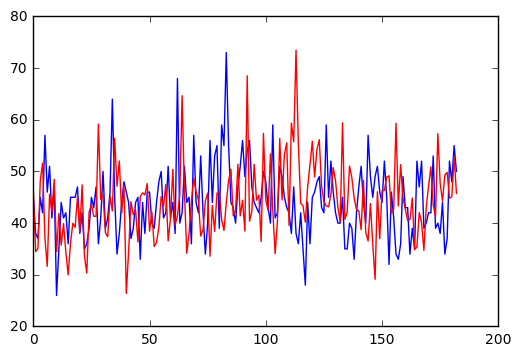

In [32]:
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()